# RESULT FOR SPEED CONSTANT

In [1]:
from AllSpeedConst import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
m = Basemap(
  projection="merc",
  resolution='l',
  area_thresh=0.1,
  llcrnrlon=-75,
  llcrnrlat=35,
  urcrnrlon=10,
  urcrnrlat=55
)

In [4]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# construct route 1
iso_set1, iso_trimmed1 = isochrone(p_dep, p_des, 1, 20, 20, 1, 1, 20, 0, 0)
iso_path1 = construct_isopath(iso_set1)
ind1 = int(np.argwhere(iso_path1[:,-1,3] == min(iso_path1[:,-1,3])).ravel())
# lowest fuel consumption
tran_fuelc = iso_path1[ind1][-1, 3]
tran_timec = iso_path1[ind1][-1, 0]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
iso_set2, iso_trimmed2 = isochrone(p_dep, p_des, 1, 20, 20, 6, 2, 20, tran_timec, tran_fuelc)
iso_path2 = construct_isopath(iso_set2)
ind2 = int(np.argwhere(iso_path2[:,-1,3] == min(iso_path2[:,-1,3])).ravel())

In [5]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# construct route 1
isop_set1, isop_trimmed1 = isopone(p_dep, p_des, 1, 20, 20, 6000, 1, 20, 0, 0)
isop_path1 = construct_isop_path(isop_set1)
ind3 = int(np.argwhere(isop_path1[:,-1,3] == min(isop_path1[:,-1,3])).ravel())
# lowest fuel consumption
tran_fuelc = isop_path1[ind3][-1, 3]
tran_timec = isop_path1[ind3][-1, 0]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
isop_set2, isop_trimmed2 = isopone(p_dep, p_des, 1, 20, 20, 20000, 1, 20, tran_timec, tran_fuelc)
isop_path2 = construct_isop_path(isop_set2)
ind4 = int(np.argwhere(isop_path2[:,-1,3] == min(isop_path2[:,-1,3])).ravel())

In [6]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# # construct route 1
dy2_set1 = TwoDDP(p_dep, p_des, 20, 1, 31, 0.08, 3, 0, 0)
dy2_path1 = construct_dypath2(dy2_set1)
dy2timec = dy2_path1[-1,0]
dy2fuelc = dy2_path1[-1,3]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
dy2_set2 = TwoDDP(p_dep, p_des, 20, 6, 31, 0.1, 3, dy2timec, dy2fuelc)
dy2_path2 = construct_dypath2(dy2_set2)

In [7]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# # construct route 1
DijkGraph1 = gen_graph(p_dep, p_des, 20, 1, 25, 0.07)
GraphWidth = len(DijkGraph1)
GraphHeight = max([len(dijkgraph) for dijkgraph in DijkGraph1])
DijkGrid1 = DijkstraGrid(GraphWidth, GraphHeight)
Dcf1, Dcsf1 = dijkstra(DijkGrid1, DijkGraph1, (0, 0), (GraphWidth - 1, 0), 20, 5, 0, 0)
Dij_path1 = construct_dijpath((GraphWidth - 1, 0),(0, 0), Dcf1, Dcsf1, DijkGraph1)
dij_timec = Dij_path1[-1,0]
dij_fuelc = Dij_path1[-1,3]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
DijkGraph2 = gen_graph(p_dep, p_des, 20, 6, 25, 0.1)
GraphWidth = len(DijkGraph2)
GraphHeight = max([len(dijkgraph) for dijkgraph in DijkGraph2])
DijkGrid2 = DijkstraGrid(GraphWidth, GraphHeight)
Dcf2, Dcsf2 = dijkstra(DijkGrid2, DijkGraph2, (0, 0), (GraphWidth - 1, 0), 20, 5, dij_timec, dij_fuelc)
Dij_path2 = construct_dijpath((GraphWidth - 1, 0),(0, 0), Dcf2, Dcsf2, DijkGraph2)

In [8]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# # construct route 1
dy3_set1 = ThreeDDP(p_dep, p_des, 20, 1, 31, 0.08, 3, 0, 0)
dy3_path1 = construct_dypath3(dy3_set1)
dy3timec = dy3_path1[-1,0]
dy3fuelc = dy3_path1[-1,3]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
dy3_set2 = ThreeDDP(p_dep, p_des, 20, 6, 31, 0.1, 3, dy3timec, dy3fuelc)
dy3_path2 = construct_dypath3(dy3_set2)

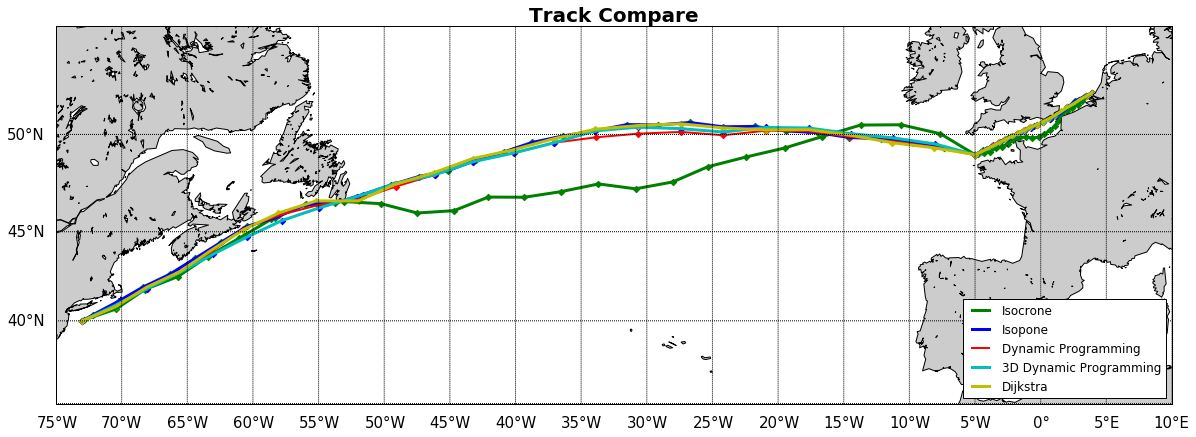

In [9]:
plt.figure(figsize=(20, 15))
plt.title('Track Comparison', fontsize=20, fontweight='bold')
# Isochrone
x, y = m(iso_path1[ind1][:, 1], iso_path1[ind1][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='g', label = "Isocrone")
m.scatter(x, y, marker='D',color='g')
x, y = m(iso_path2[ind2][:, 1], iso_path2[ind2][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='g')
m.scatter(x, y, marker='D',color='g')
# Isopone
x, y = m(isop_path1[ind3][:, 1], isop_path1[ind3][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='b', label = "Isopone")
m.scatter(x, y, marker='D',color='g')
x, y = m(isop_path2[ind4][:, 1], isop_path2[ind4][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='b')
m.scatter(x, y, marker='D',color='g')
# 2D
x, y = m(dy2_path1[:,2], dy2_path1[:,3])
m.plot(x, y, marker=None, linewidth=2, color='r', label = "Dynamic Programming")
m.scatter(x, y, marker='D',color='r')
x, y = m(dy2_path2[:,2], dy2_path2[:,3])
m.plot(x, y, marker=None, linewidth=2, color='r')
m.scatter(x, y, marker='D',color='r')
# 3D
x, y = m(dy3_path1[:,1], dy3_path1[:,2])
m.plot(x, y, marker=None, linewidth=3, color='c', label = "3D Dynamic Programming")
m.scatter(x, y, marker='D',color='b')
x, y = m(dy3_path2[:,1], dy3_path2[:,2])
m.plot(x, y, marker=None, linewidth=3, color='c')
m.scatter(x, y, marker='D',color='b')
# Dij
x, y = m(Dij_path1[:,1], Dij_path1[:,2])
m.plot(x, y, marker=None, linewidth=3, color='y', label = "Dijkstra")
m.scatter(x, y, marker='D',color='y')
x, y = m(Dij_path2[:,1], Dij_path2[:,2])
m.plot(x, y, marker=None, linewidth=3, color='y')
m.scatter(x, y, marker='D',color='y')
    
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
m.drawcoastlines()
m.fillcontinents()
plt.legend(loc = 4)
plt.show()

In [39]:
iso_int = np.vstack((iso_path1[ind1][1:], iso_path2[ind2][1:]))
isop_int = np.vstack((isop_path1[ind3][1:], isop_path2[ind4][1:]))
dy2_int = np.vstack((dy2_path1[1:], dy2_path2[1:]))
dy3_int = np.vstack((dy3_path1[1:], dy3_path2[1:]))
dij_int = np.vstack((Dij_path1[1:], Dij_path2[1:]))

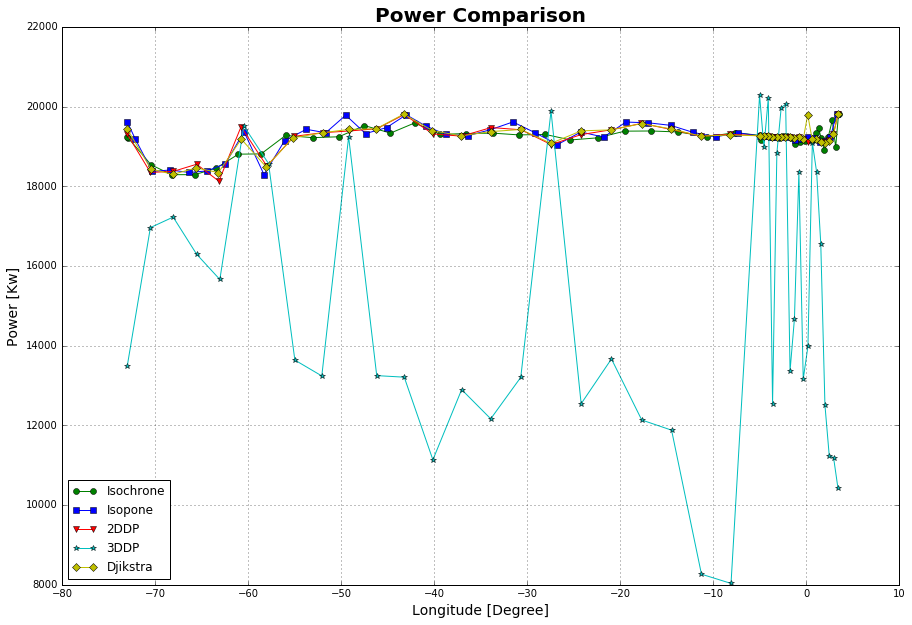

In [37]:
plt.figure(figsize=(15, 10))
plt.title("Power Comparison", fontsize = 20, fontweight='bold')
plt.ylabel("Power [Kw]", fontsize = 14)
plt.xlabel("Longitude [Degree]", fontsize = 14)
plt.plot(iso_int[:,1],iso_int[:,5], marker = "o", color = "g", label = "Isochrone")
plt.plot(isop_int[:,1],isop_int[:,5], marker = "s", color = "b", label = "Isopone")
plt.plot(dy2_int[:,2],dy2_int[:,6], marker = "v", color = "r", label = "2DDP")
plt.plot(dy3_int[:,1],dy3_int[:,6], marker ="*", color = "c", label = "3DDP")
plt.plot(dij_int[:,1],dij_int[:,5], marker = "D", color = "y", label = "Djikstra")

plt.grid()
plt.legend(loc = 3)
plt.show()

In [24]:
hs = {}
hs[1] = [weather_info.hs([i[2],i[1],i[0]]) for i in iso_int]
hs[2] = [weather_info.hs([i[2],i[1],i[0]]) for i in isop_int]
hs[3] = [weather_info.hs([i[3],i[2],i[0]]) for i in dy2_int]
hs[4] = [weather_info.hs([i[2],i[1],i[0]]) for i in dy3_int]
hs[5] = [weather_info.hs([i[2],i[1],i[0]]) for i in dij_int]

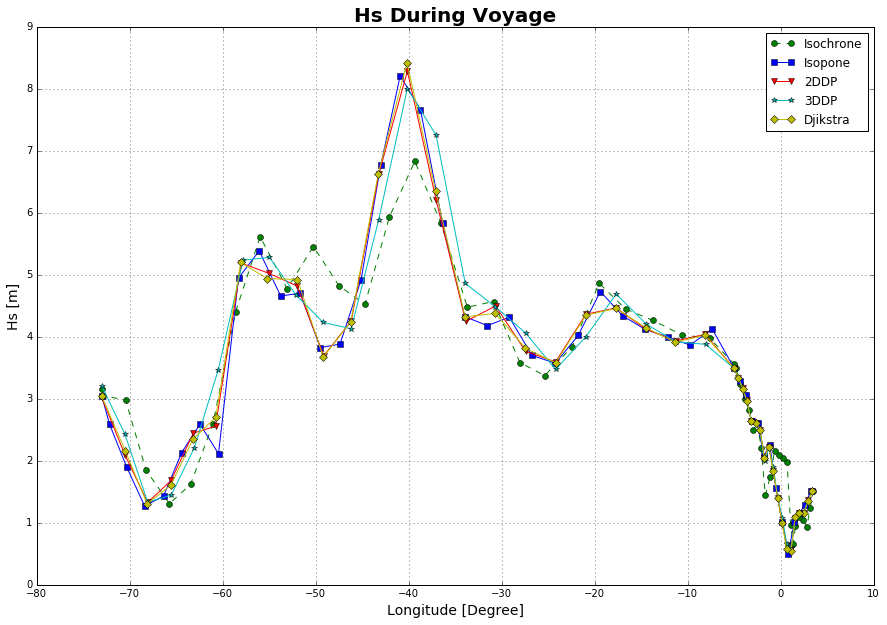

In [49]:
plt.figure(figsize=(15, 10))
plt.title("Hs During Voyage", fontsize = 20, fontweight='bold')
plt.ylabel("Hs [m]", fontsize = 14)
plt.xlabel("Longitude [Degree]", fontsize = 14)
plt.plot(iso_int[:,1], hs[1], marker = "o", color = "g", label = "Isochrone", linestyle = "--")
plt.plot(isop_int[:,1],hs[2], marker = "s", color = "b", label = "Isopone")
plt.plot(dy2_int[:,2],hs[3], marker = "v", color = "r", label = "2DDP")
plt.plot(dy3_int[:,1],hs[4], marker = "*", color = "c", label = "3DDP")
plt.plot(dij_int[:,1],hs[5], marker = "D", color = "y", label = "Djikstra")

plt.grid()
plt.legend(loc = 1)
plt.show()

In [40]:
iso_int[:,0]

array([   1.        ,    2.        ,    3.        ,    4.        ,
          5.        ,    6.        ,    7.        ,    8.        ,
          9.        ,   10.        ,   11.        ,   12.        ,
         13.        ,   14.        ,   15.        ,   16.        ,
         17.        ,   18.        ,   19.        ,   20.        ,
         21.        ,   21.4357437 ,   27.4357437 ,   33.4357437 ,
         39.4357437 ,   45.4357437 ,   51.4357437 ,   57.4357437 ,
         63.4357437 ,   69.4357437 ,   75.4357437 ,   81.4357437 ,
         87.4357437 ,   93.4357437 ,   99.4357437 ,  105.4357437 ,
        111.4357437 ,  117.4357437 ,  123.4357437 ,  129.4357437 ,
        135.4357437 ,  141.4357437 ,  147.4357437 ,  153.4357437 ,
        159.4357437 ,  165.4357437 ,  171.4357437 ,  171.76206757])

In [41]:
isop_int[:,0]

array([   1.39632769,    2.83378347,    4.27945521,    5.72648849,
          7.16567705,    8.60289823,   10.04483512,   11.4878123 ,
         12.92613471,   14.36364153,   15.80134692,   17.23869422,
         18.6744147 ,   20.11638218,   24.88187457,   29.67242625,
         34.43562295,   39.15540509,   43.85984994,   48.55979789,
         53.35216245,   58.11262372,   62.95200263,   67.71622201,
         72.41556517,   77.16232449,   81.94568358,   86.72131398,
         91.4449855 ,   96.10164358,  100.83503352,  105.6054357 ,
        110.26440938,  115.02954293,  119.77347788,  124.58770194,
        129.62595809,  134.38458068,  139.34854839,  144.36188779,
        149.38579299,  154.39299408,  159.40949998,  164.21106577,
        166.44050069])

In [42]:
dy2_int[:,0]

array([   1.09734913,    2.16656946,    3.23841812,    4.2965564 ,
          5.3580929 ,    6.4104325 ,    7.46676764,    8.52672573,
          9.56968827,   10.60988207,   11.65082619,   12.69323815,
         13.74040917,   14.79148624,   15.84028231,   16.89020407,
         17.94185348,   18.99319299,   20.04971442,   26.3436409 ,
         32.71926461,   39.02019724,   45.27213   ,   51.64086911,
         57.93516598,   64.17487763,   70.51096104,   76.97008448,
         83.33096886,   89.65768037,   96.4007296 ,  102.94883121,
        109.36408985,  115.71512516,  122.34192043,  128.63659579,
        134.87697557,  141.17176921,  147.41191037,  153.65205152,
        159.89233585,  166.18720046])

In [43]:
dy3_int[:,0]

array([   1.32285557,    2.54171479,    3.70047304,    4.76540819,
          5.81890436,    6.82157289,    7.87870244,    8.89737158,
          9.92482288,   10.92531106,   11.9196073 ,   12.9338951 ,
         13.96829618,   15.00666381,   15.99127606,   17.02517979,
         18.00369471,   18.99026467,   20.02863518,   28.12598746,
         35.63210296,   42.77470632,   49.45593227,   55.78306887,
         62.01214396,   68.25209423,   74.43003939,   80.78305423,
         87.19737105,   93.26482506,   99.73029808,  105.609074  ,
        112.12275976,  117.91572031,  124.59774826,  130.83769852,
        137.05949157,  143.70073134,  149.77656308,  156.15090082,
        162.14944003,  168.72249125])

In [44]:
dij_int[:,0]

array([   1.09839261,    2.16776935,    3.24061586,    4.29485508,
          5.34891131,    6.39292322,    7.45530855,    8.54991297,
          9.59331828,   10.63383952,   11.6750765 ,   12.71774465,
         13.76517966,   14.81279434,   15.86178825,   16.91203651,
         17.96385898,   19.01542135,   20.07304462,   26.38428888,
         32.76714194,   39.04740807,   45.30406076,   51.68440657,
         57.95154286,   64.20199009,   70.54285709,   76.94641829,
         83.33380216,   89.63559035,   96.39526488,  102.94501524,
        109.35501931,  115.74438649,  122.60576445,  128.85636057,
        135.07849914,  141.32909527,  147.5795425 ,  153.82998973,
        160.05201611,  166.3874016 ])

In [45]:
dy3_int[:,4]

array([ 15.36842105,  16.21052632,  16.21052632,  17.05263158,
        18.31578947,  19.15789474,  19.15789474,  17.47368421,
        17.47368421,  19.15789474,  17.89473684,  17.47368421,
        19.57894737,  19.57894737,  19.15789474,  17.05263158,
        19.57894737,  19.15789474,  19.57894737,  15.36842105,
        15.36842105,  17.47368421,  17.47368421,  17.47368421,
        17.47368421,  20.        ,  17.47368421,  17.05263158,
        17.47368421,  16.63157895,  16.63157895,  17.47368421,
        19.15789474,  17.47368421,  17.47368421,  20.        ,
        20.        ,  18.73684211,  19.15789474,  19.57894737,
        19.57894737,  17.89473684])

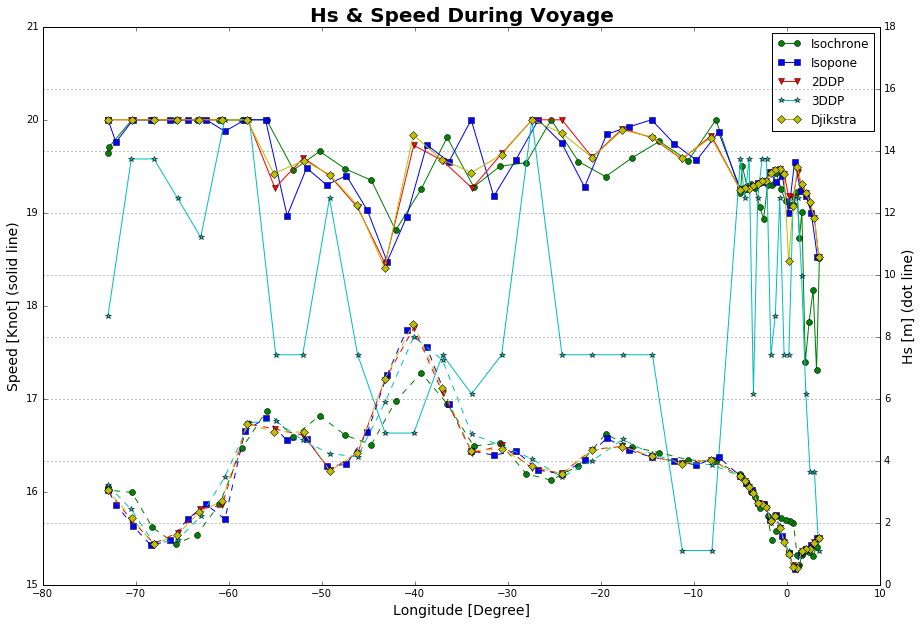

In [70]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()


ax1.set_title("Hs & Speed During Voyage", fontsize = 20, fontweight='bold')
ax1.set_xlabel("Longitude [Degree]", fontsize = 14)
ax1.set_ylabel("Speed [Knot] (solid line)", fontsize = 14)
ax1.set_ylim([15,21])
ax1.plot(iso_int[:,1],iso_int[:,8], marker = "o", color = "g", label = "Isochrone")
ax1.plot(isop_int[:,1],isop_int[:,8], marker = "s", color = "b", label = "Isopone")
ax1.plot(dy2_int[:,2],dy2_int[:,1], marker = "v", color = "r", label = "2DDP")
ax1.plot(dy3_int[:,1],dy3_int[:,4], marker ="*", color = "c", label = "3DDP")
ax1.plot(dij_int[:,1],dij_int[:,8], marker = "D", color = "y", label = "Djikstra")
ax1.legend(loc = 1)

ax2.set_ylabel("Hs [m] (dot line)", fontsize = 14)
ax2.set_ylim([0,18])
ax2.plot(iso_int[:,1], hs[1], marker = "o", color = "g", label = "Isochrone",linestyle = "--")
ax2.plot(isop_int[:,1],hs[2], marker = "s", color = "b", label = "Isopone",linestyle = "--")
ax2.plot(dy2_int[:,2],hs[3], marker = "v", color = "r", label = "2DDP",linestyle = "--")
ax2.plot(dy3_int[:,1],hs[4], marker = "*", color = "c", label = "3DDP",linestyle = "--")
ax2.plot(dij_int[:,1],hs[5], marker = "D", color = "y", label = "Djikstra",linestyle = "--")



plt.grid()

plt.show()